<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Mathco_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Data
With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.

## Dataset Description
Train.csv - 19237 rows x 18 columns (Includes Price Columns as Target)

####Attributes
* ID
* Price: price of the care(Target Column)
* Levy
* Manufacturer
* Model
* Prod. year
* Category
* Leather interior
* Fuel type
* Engine volume
* Mileage
* Cylinders
* Gear box type
* Drive wheels
* Doors
* Wheel
* Color
* Airbags

#### Test Data
Test.csv - 8245 rows x 17 columns

#### Sample Submission.csv -Please check the Evaluation section for more details on how to generate a valid submission


## What is the Metric In this competition

The submission will be evaluated using the RMSLE metric. One can use np.sqrt(mean_squared_log_error(actual, predicted)) to calculate the same

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhxp-NPH7EN235l3dLrp3mNktX3x0XNTlkgUN0UFyi_xrXtALxLNV4
Mounted at /content/drive


##Uzip files and store in drive

In [ ]:
!unzip "/content/Participant_Data_TheMathCompany_.DSHH.zip" -d "/content/drive/MyDrive/Mathco"

Archive:  /content/Participant_Data_TheMathCompany_.DSHH.zip
  inflating: /content/drive/MyDrive/Mathco/train.csv  
  inflating: /content/drive/MyDrive/Mathco/__MACOSX/._train.csv  
  inflating: /content/drive/MyDrive/Mathco/test.csv  
  inflating: /content/drive/MyDrive/Mathco/__MACOSX/._test.csv  
  inflating: /content/drive/MyDrive/Mathco/submission.csv  
  inflating: /content/drive/MyDrive/Mathco/__MACOSX/._submission.csv  


##Klib is an open-source python library that can be used to visualize, analyze and preprocess the data easily without much effort

In [2]:
!pip install klib

     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
! pip install pycaret[full]

     |████████████████████████████████| 266kB 7.9MB/s 
     |████████████████████████████████| 1.7MB 14.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.4MB 37.0MB/s 
     |████████████████████████████████| 81kB 13.4MB/s 
     |████████████████████████████████| 61kB 10.8MB/s 
     |████████████████████████████████| 6.8MB 46.1MB/s 
     |████████████████████████████████| 112kB 55.2MB/s 
     |████████████████████████████████| 256kB 51.3MB/s 
     |████████████████████████████████| 276kB 48.5MB/s 
     |████████████████████████████████| 2.0MB 44.8MB/s 
     |████████████████████████████████| 14.2MB 46.6MB/s 
     |████████████████████████████████| 174kB 56.0MB/s 
     |████████████████████████████████| 348kB 36.5MB/s 
     |████████████████████████████████| 69.2MB 80kB/s 
     |████████████████████████████████| 3.6MB 44.2

In [4]:
import klib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#
# 
import pycaret
from pycaret.regression import *
#

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error
import xgboost as xgb
import lightgbm as lgb
#
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter

In [5]:
train = pd.read_csv("/content/drive/MyDrive/Mathco/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Mathco/test.csv")

# Shape of Dataframe

In [ ]:
train.shape,test.shape

((19237, 18), (8245, 18))

## Summary Statistics

In [ ]:
train.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


## Check for null values

In [6]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

## Creating Visualizations

In [ ]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [7]:
train = train[['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price']]

#### Correlation Plot

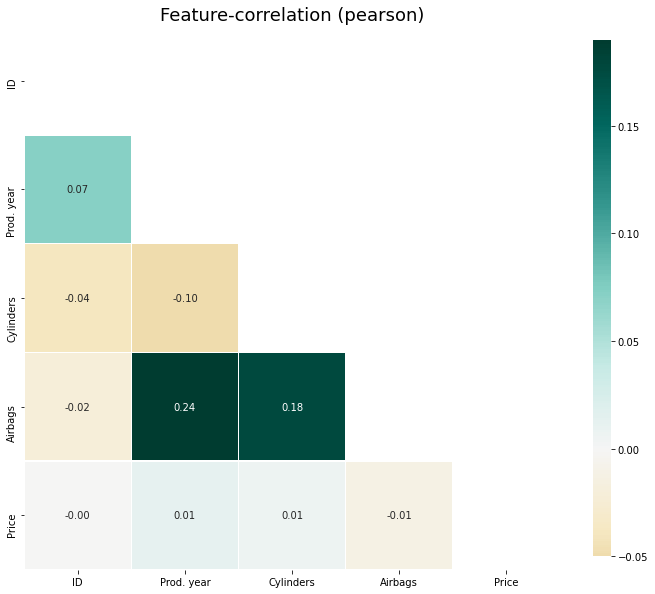

In [ ]:
klib.corr_plot(train)

##Categorical plot

GridSpec(6, 13)

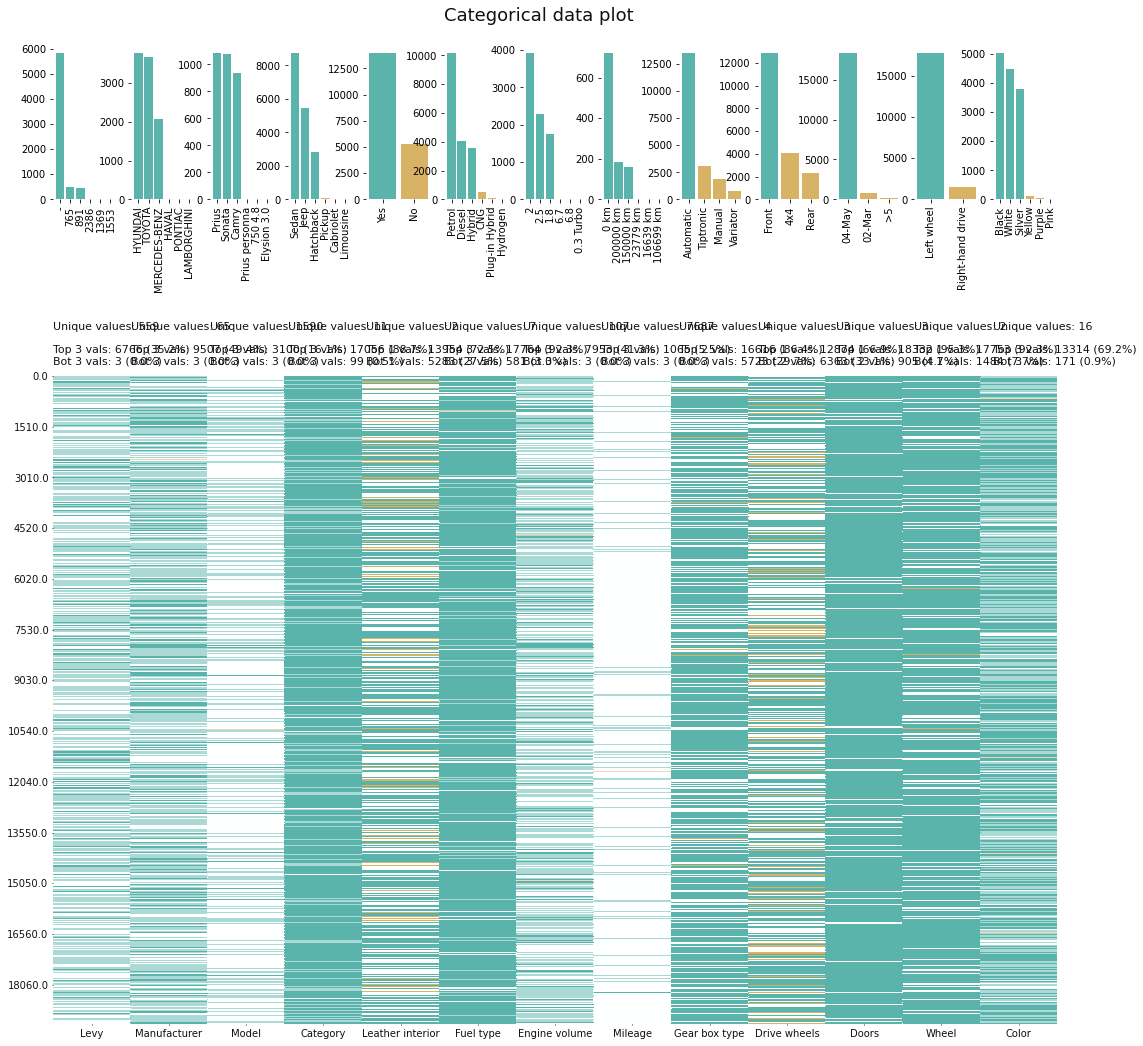

In [ ]:
klib.cat_plot(train)

## Distribution Plot

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


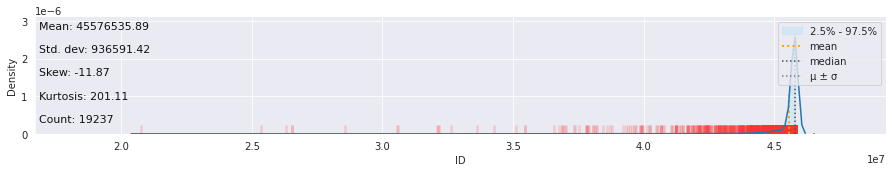

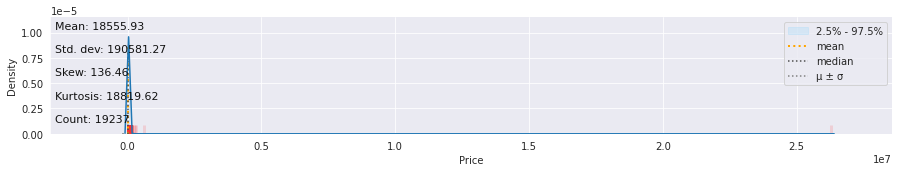

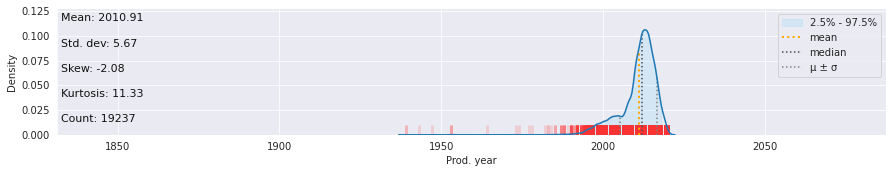

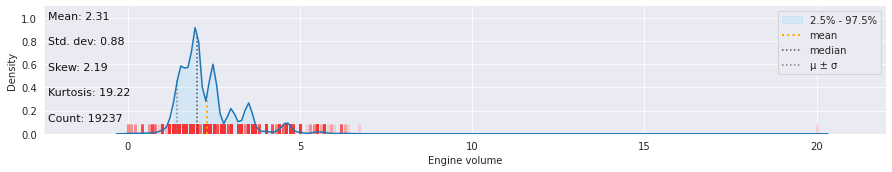

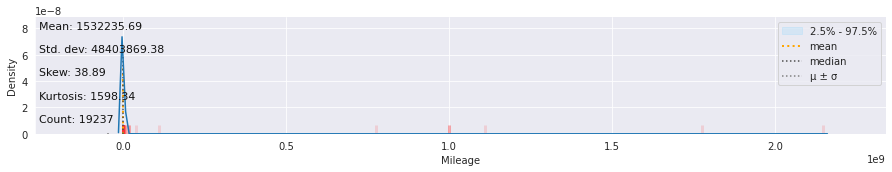

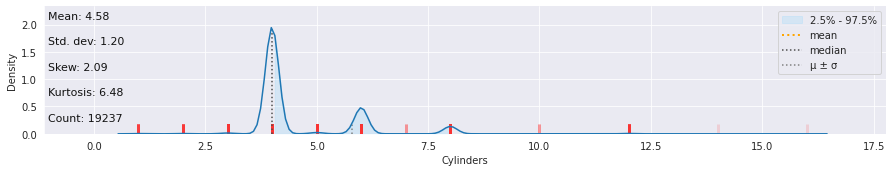

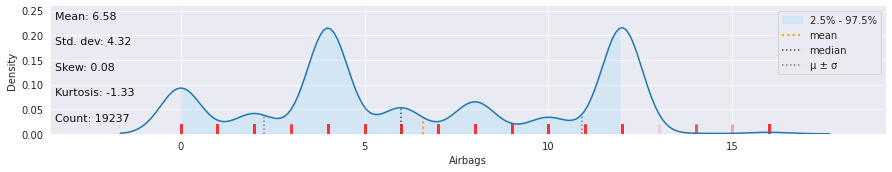

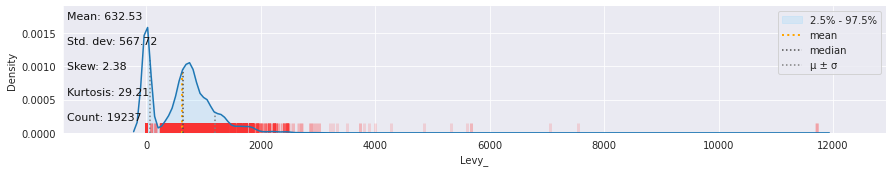

In [ ]:
klib.dist_plot(train)

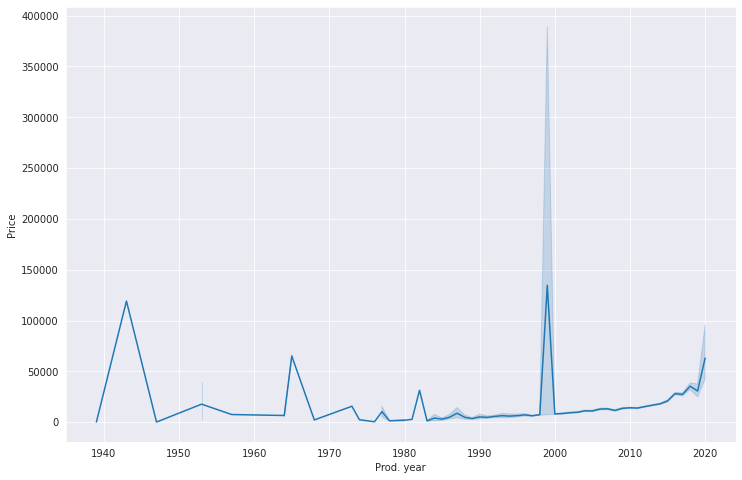

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Prod. year',y='Price',data=train)
plt.show()

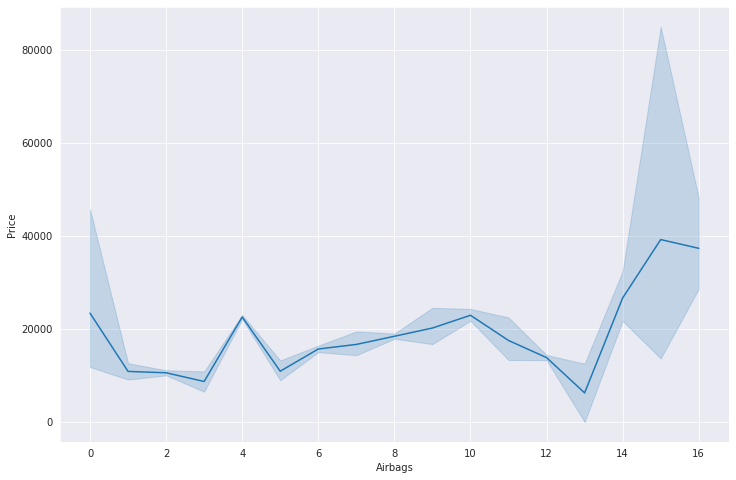

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Airbags',y='Price',data=train)
plt.show()

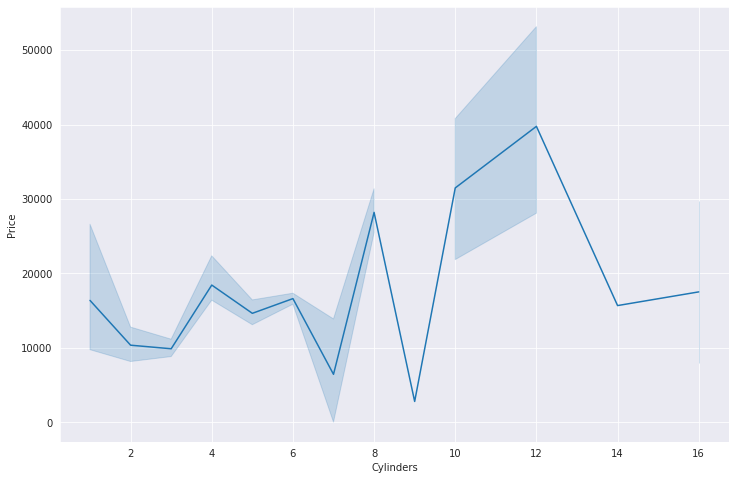

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Cylinders',y='Price',data=train)
plt.show()

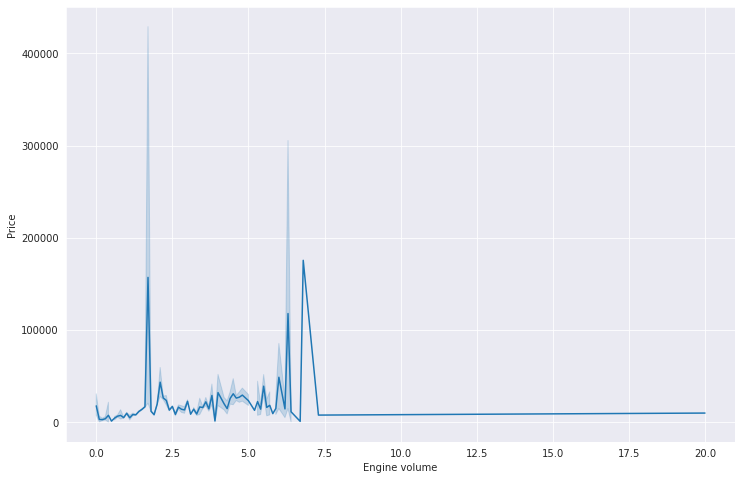

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Engine volume',y='Price',data=train)
plt.show()

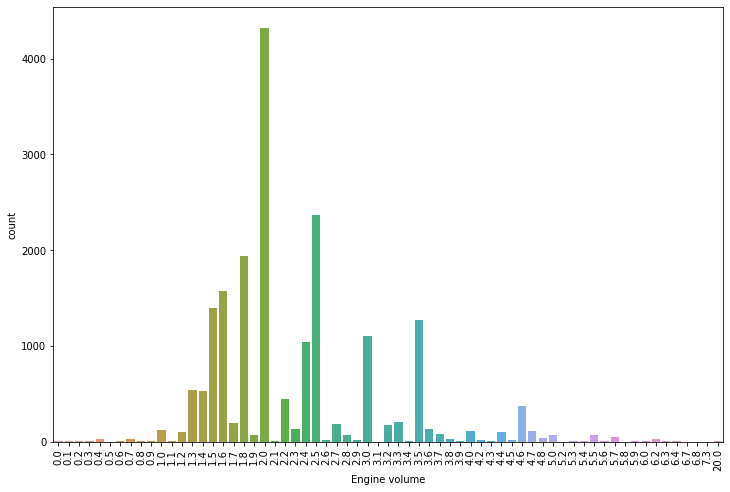

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x='Engine volume',data=train)

In [ ]:
train['Levy_'] = np.where(train['Levy'] != "-",train['Levy'],0 )
test['Levy_'] = np.where(test['Levy'] != "-",test['Levy'],0 )

In [ ]:
train['Levy_'] = train['Levy_'].astype(int)
test['Levy_'] = test['Levy_'].astype(int)

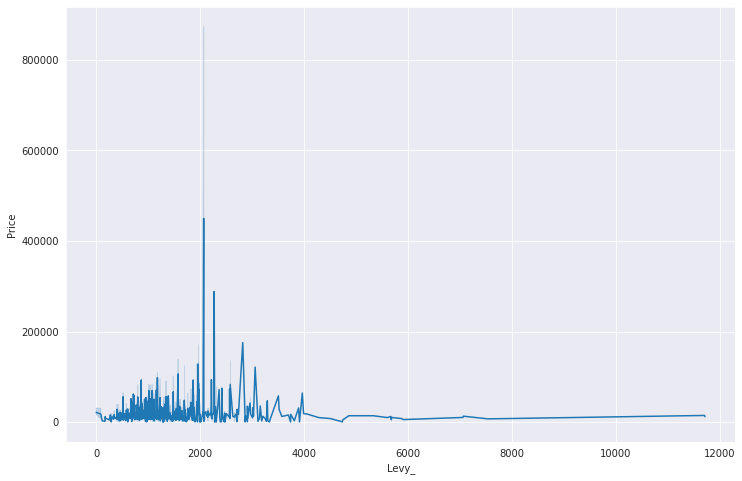

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Levy_',y='Price',data=train)

In [ ]:
train.tail()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy_
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467,0
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681,831
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108,836
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331,1288
19236,45813273,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,470,753


In [8]:
train['Mileage'] = train['Mileage'].apply(lambda x : float(x.split(" ")[0]))
test['Mileage'] = test['Mileage'].apply(lambda x : float(x.split(" ")[0]))

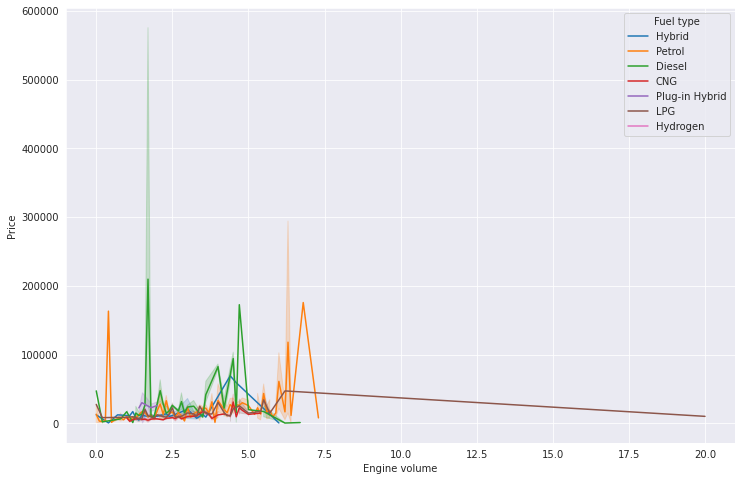

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Engine volume',y='Price',data=train,hue='Fuel type')

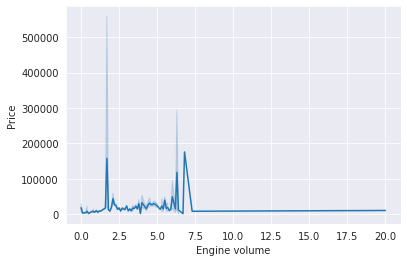

In [ ]:
sns.lineplot(x='Engine volume',y='Price',data=train)

In [ ]:
train.tail()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy_,no_year
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,8467,0,22
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,15681,831,10
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,26108,836,11
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,5331,1288,14
19236,45813273,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923.0,4.0,Automatic,Front,04-May,Left wheel,White,12,470,753,9


In [13]:
train['Prod. year'].max(),test['Prod. year'].max()

(2020, 2020)

In [23]:
train['Current_Year'] = 2020
test['Current_Year'] = 2020

In [24]:
train['no_year'] = train['Current_Year']  - train['Prod. year']
test['no_year'] = test['Current_Year']  - test['Prod. year']

In [16]:
train.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,no_year,Current_Year
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328,10,2020
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,9,2020
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467,14,2020
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607,9,2020
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726,6,2020


In [25]:
train.drop(['Current_Year'],axis=1,inplace=True)
test.drop(['Current_Year'],axis=1,inplace=True)

In [18]:
train.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,no_year
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328,10
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621,9
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467,14
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607,9
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726,6


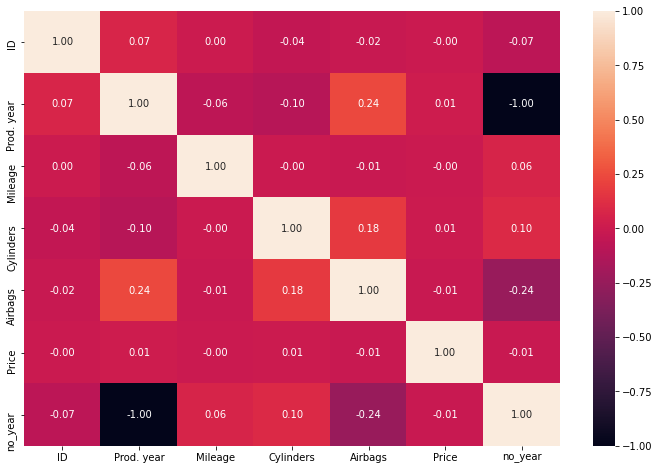

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

In [26]:
train.drop(['no_year'],axis=1,inplace=True)
test.drop(['no_year'],axis=1,inplace=True)

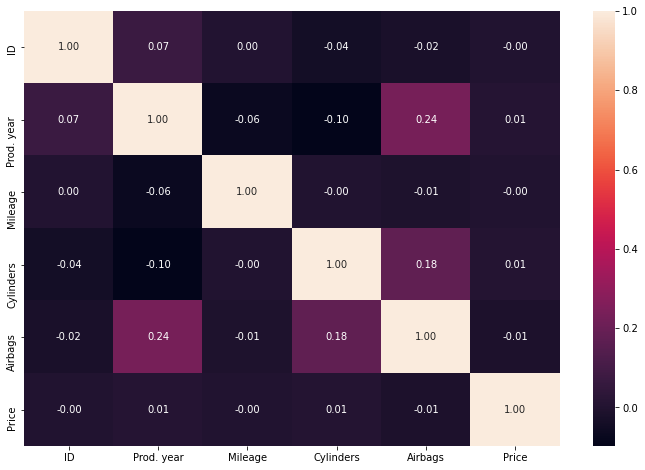

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

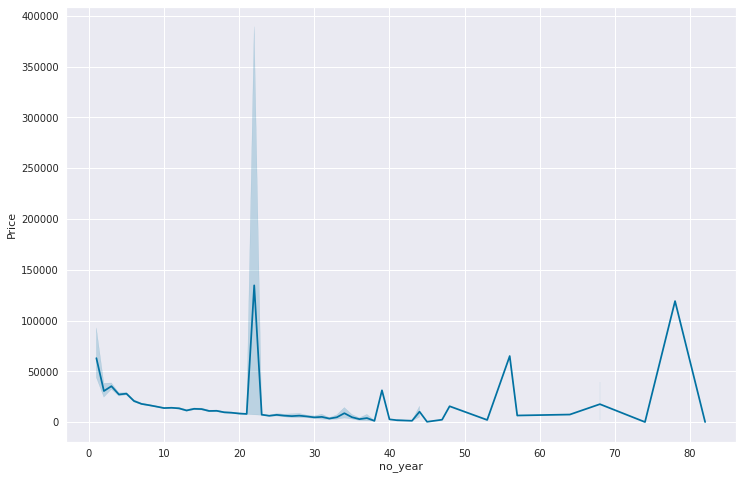

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='no_year',y='Price',data=train_new)

## Categorical Variables

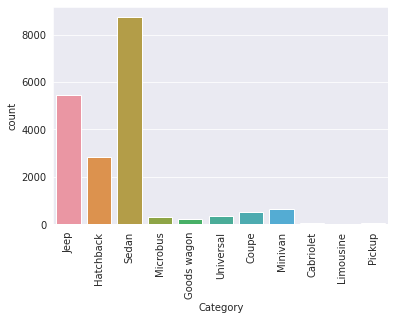

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x='Category',data=train)

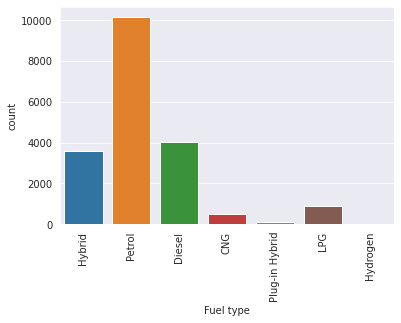

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x='Fuel type',data=train)

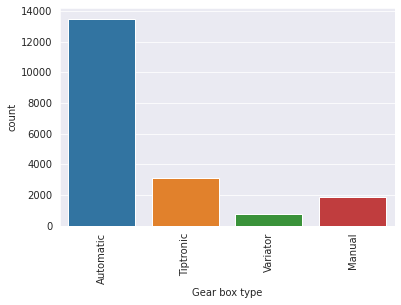

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x='Gear box type',data=train)

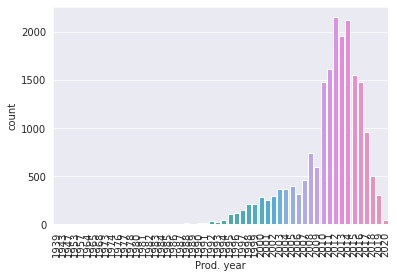

In [ ]:
plt.xticks(rotation=90)
sns.countplot(x='Prod. year',data=train)

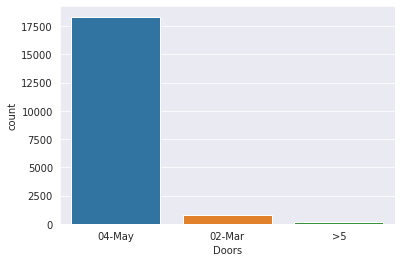

In [ ]:
sns.countplot(x='Doors',data=train)

In [ ]:
train.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price', 'Levy_', 'no_year'],
      dtype='object')

In [31]:
train['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
3.5          1228
2.4           987
3             823
1.3           518
2.0 Turbo     408
1.4           374
4.6           370
3.0 Turbo     278
2.2           227
2.2 Turbo     219
3.3           204
1.8 Turbo     177
1.7           157
1.4 Turbo     157
3.2           148
2.7           133
3.6           123
1             117
1.6 Turbo     116
2.3           116
4             108
1.2           101
4.7            98
2.5 Turbo      93
4.4            81
3.7            79
1.5 Turbo      72
5              67
2.8            58
5.5            57
5.7            51
2.4 Turbo      50
2.7 Turbo      49
3.5 Turbo      42
1.9            39
1.7 Turbo      38
4.8            34
3.8            32
1.9 Turbo      31
6.2            25
4.4 Turbo      25
3.2 Turbo      24
0.4            22
0.7            19
4.2            18
2.6            18
4.7 Turbo      18
1.3 Turbo      18
2.3 Turbo      16
2.8 Turbo      13
2.9 Turbo 

In [32]:
train['Engine volume'] = train['Engine volume'].apply(lambda x : float(x.split(" ")[0]))
test['Engine volume'] = test['Engine volume'].apply(lambda x : float(x.split(" ")[0]))

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  float64
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [ ]:
train['Mileage'].describe()

count    1.923700e+04
mean     1.532236e+06
std      4.840387e+07
min      0.000000e+00
25%      7.013900e+04
50%      1.260000e+05
75%      1.888880e+05
max      2.147484e+09
Name: Mileage, dtype: float64

In [34]:
train.Mileage.min(),train.Mileage.max()

(0.0, 2147483647.0)

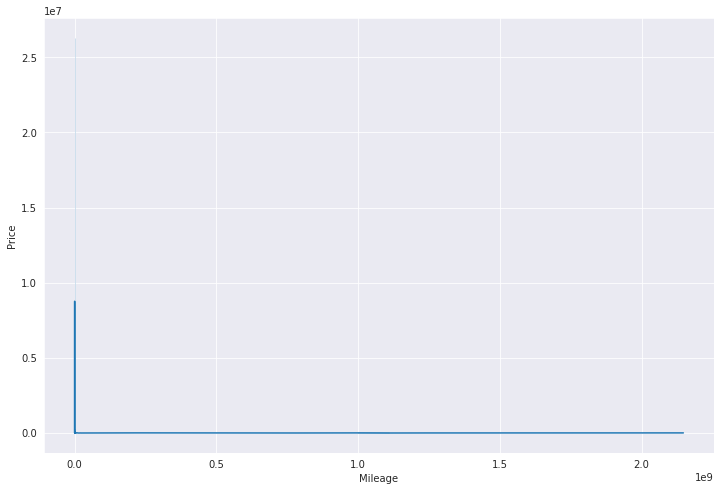

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(x='Mileage',y='Price',data=train)
plt.show()

In [ ]:
train.ID.nunique()

18924

In [ ]:
train.ID.nunique()/train.shape[0],test.ID.nunique()/test.shape[0]

(0.983729271715964, 0.9909035779260158)

In [39]:
train['Levy'] = np.where(train['Levy'] == '-',0,train['Levy'])

In [40]:
test['Levy'] = np.where(test['Levy'] == '-',0,test['Levy'])

In [51]:
train['Levy'] = train['Levy'].apply(lambda x : int(x))

In [53]:
test['Levy'] = test['Levy'].apply(lambda x : int(x))

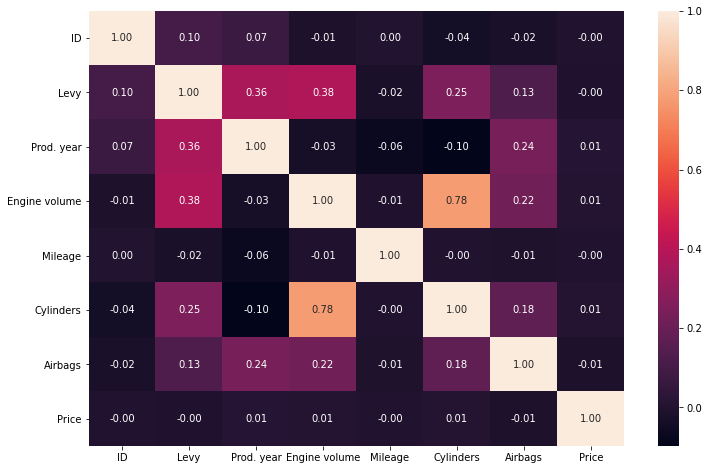

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True,fmt=".2f")

In [54]:
cat_cols = [col for col in train.columns if train[col].dtypes == 'O']
cat_cols

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [55]:
train[cat_cols].head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,04-May,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,04-May,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,04-May,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,04-May,Left wheel,Silver


In [59]:
train.groupby('Category').agg('Price').mean()

Category
Cabriolet       24583.694444
Coupe           21250.406015
Goods wagon    122916.180258
Hatchback       11381.245873
Jeep            23684.285949
Limousine       11534.454545
Microbus        18550.928105
Minivan         20531.221020
Pickup          28805.269231
Sedan           14231.545902
Universal       25253.700549
Name: Price, dtype: float64

In [56]:
train_new = train.drop(['ID'],axis=1)
test_new = test.drop(['ID'],axis=1)

In [60]:
train_new.shape,test_new.shape

((19237, 17), (8245, 17))

In [61]:
test_new.drop('Price',axis=1,inplace=True)

In [62]:
test_new.shape

(8245, 16)

## Setup data

In [64]:
reg = setup(data = train_new, 
            target = 'Price',
            use_gpu =True,
            preprocess=True,
            log_data=True,
            log_experiment=True,
            normalize=True)

,Description,Value
0,session_id,2054
1,Target,Price
2,Original Data,"(19237, 17)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(13465, 1400)"


In [ ]:
best = compare_models(n_select = 15,sort='RMSLE')
compare_model_results = pull()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,8.164394e+03,1.019746e+11,1.502169e+05,-1.331071e+02,0.9896,9.0026,22.943
rf,Random Forest Regressor,7.850710e+03,6.410017e+10,1.338917e+05,-3.203180e+01,1.0245,9.2415,18.538
knn,K Neighbors Regressor,9.067017e+03,6.287212e+10,1.303087e+05,-2.755400e+01,1.1305,9.3709,5.453
dt,Decision Tree Regressor,7.060534e+03,5.419855e+10,8.309949e+04,5.626000e-01,1.2430,8.6480,0.358
xgboost,Extreme Gradient Boosting,9.448113e+03,1.080785e+11,1.541514e+05,-1.502029e+02,1.2573,10.3675,1.291
catboost,CatBoost Regressor,8.721264e+03,6.865587e+10,1.206137e+05,-3.994240e+01,1.2995,10.6682,4.568
lightgbm,Light Gradient Boosting Machine,1.117203e+04,5.725898e+10,1.209807e+05,-8.927700e+00,1.3420,12.5588,0.282
par,Passive Aggressive Regressor,1.004951e+04,5.431145e+10,8.598720e+04,3.373000e-01,1.4183,10.4107,15.224
huber,Huber Regressor,9.981170e+03,5.430211e+10,8.557650e+04,3.741000e-01,1.4343,10.6892,7.624
gbr,Gradient Boosting Regressor,1.052486e+04,6.677773e+10,1.185035e+05,-3.465560e+01,1.4609,13.2034,7.566


In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4575.5580,1.307784e+08,11435.8391,0.6675,0.9546,11.3265
1,4160.0951,7.412175e+07,8609.3987,0.7345,0.9608,4.4731
2,4637.9897,5.699339e+08,23873.2885,0.3281,0.9908,5.6302
3,4168.4987,7.813503e+07,8839.4020,0.7516,1.0339,19.9525
4,3855.4872,5.486005e+07,7406.7570,0.8022,1.0308,8.6687
5,4238.6775,9.016355e+07,9495.4491,0.7253,1.0263,13.0553
6,4576.5565,3.059990e+08,17492.8272,0.5105,0.9212,4.6812
7,4441.9674,1.052565e+08,10259.4572,0.6943,0.9381,3.7529
8,4071.0036,1.008391e+08,10041.8681,0.7062,1.0078,9.4584
9,4041.6478,7.366843e+07,8583.0313,0.7466,0.8833,9.3602


In [ ]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6031.4822,1.482559e+08,12176.0390,0.6231,1.2722,13.1761
1,5711.6370,8.716596e+07,9336.2713,0.6878,1.2818,7.2040
2,6543.0060,5.613413e+08,23692.6433,0.3382,1.3759,8.5407
3,5632.3589,9.525229e+07,9759.7281,0.6971,1.3527,22.7947
4,5864.2000,8.379529e+07,9153.9765,0.6979,1.3719,10.8173
5,5847.7066,1.001665e+08,10008.3194,0.6948,1.3682,17.6946
6,6058.1503,2.971715e+08,17238.6624,0.5246,1.3017,7.9345
7,6043.7518,1.156846e+08,10755.6795,0.6640,1.2327,5.6822
8,5851.1524,1.232973e+08,11103.9318,0.6408,1.3936,12.6896
9,5574.1629,9.444699e+07,9718.3840,0.6752,1.2605,13.2718


In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# predictions on new dataset
pred_new = predict_model(tuned_et, data = test_new) #new_data is pd dataframe


In [ ]:
pred_new = pred_new.rename(columns={'Label':'Price'})
pred_new

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,Levy_,Price
0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,0,12734.676923
1,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,0,15735.205769
2,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,0,11267.338462
3,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,975,10369.832692
4,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,04-May,Left wheel,Black,0,NaN,0,9825.357692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000,4,Manual,Front,04-May,Left wheel,Blue,6,NaN,1357,11870.953846
8241,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,156000,4,Tiptronic,Front,04-May,Left wheel,Black,6,NaN,0,14859.371154
8242,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907,8,Automatic,4x4,04-May,Left wheel,Black,0,NaN,1646,10614.101923
8243,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000,4,Automatic,Front,04-May,Left wheel,Green,4,NaN,784,13831.850000


In [ ]:
pred_new.isnull().sum()

Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
Levy_                  0
Price                  0
dtype: int64

## train a voting regressor dynamically

In [89]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5,sort='RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4565.6053,8.412499e+07,9171.9675,0.7232,1.0973,20.0706
1,4487.2584,6.680807e+07,8173.6203,0.7571,0.9958,3.8118
2,4536.2808,9.142675e+07,9561.7338,0.7287,1.1730,10.2362
3,5211.8002,2.430146e+08,15588.9252,0.6247,1.1571,7.0525
4,4595.6900,7.933134e+07,8906.8145,0.7652,1.1706,16.9254
5,4452.1346,8.050069e+07,8972.2177,0.7425,1.1509,8.0327
6,4767.1613,9.615713e+07,9805.9742,0.7064,1.1438,17.9833
7,5315.8431,4.872615e+08,22074.0010,0.4252,1.1698,7.8015
8,4444.5499,8.722334e+07,9339.3435,0.7212,1.1560,12.0169
9,4092.9986,4.884836e+07,6989.1600,0.8281,1.1483,17.5707


## Blending model calibrated is as follows

In [90]:
blender_specific

VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                  

## Analyzing model performance in PyCaret

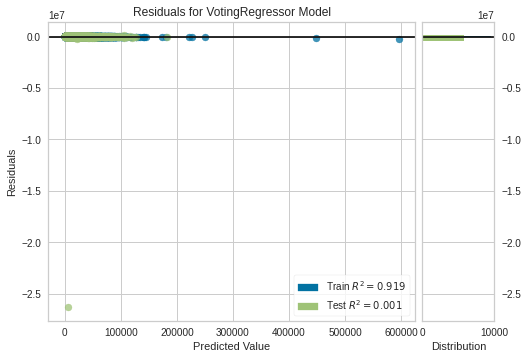

In [91]:
plot_model(blender_specific)

##Evaluate the model performance

In [92]:
evaluate_model(blender_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Make predictions on the validation set

In [93]:
val_pred = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,9336.5119,1.199637e+11,346357.8312,0.0011,1.1468,8.5892


## Stacking

In [110]:
# stack models dynamically
top5 = compare_models(n_select = 5,sort='RMSLE')
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4306.7848,8.092826e+07,8996.0137,0.7337,0.9852,27.3663
1,4206.5325,6.879633e+07,8294.3554,0.7498,0.8846,3.3598
2,4145.0262,7.837070e+07,8852.7230,0.7674,1.0283,9.7639
3,4981.0322,2.518430e+08,15869.5605,0.6111,1.0880,7.1658
4,4253.5570,7.918733e+07,8898.7262,0.7656,1.0618,14.7712
5,4237.2171,9.385077e+07,9687.6606,0.6998,1.0178,7.6256
6,4558.3996,9.640742e+07,9818.7282,0.7057,1.0478,17.8011
7,5000.9501,4.910617e+08,22159.9122,0.4207,1.0617,6.6318
8,4321.4376,8.916456e+07,9442.6988,0.7150,1.0440,10.8268
9,3818.9862,4.743762e+07,6887.4972,0.8331,1.0267,16.2989


In [111]:
stacker

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x7FAB99997380,
   shuffle=False),
                  estimators=[('rf',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,...
                  final_estimator=ExtraTreesRegr

In [112]:
evaluate_model(stacker)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [113]:
# predictions on new dataset
pred_new = predict_model(stacker, data = test_new) 

In [114]:
pred_new = pred_new.rename(columns={'Label':'Price'})
pred_new

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0.0,4,Manual,Front,02-Mar,Left wheel,Grey,10,12431.110
1,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,4,Tiptronic,Front,04-May,Left wheel,Grey,10,11670.220
2,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,7741.870
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,6,Automatic,4x4,04-May,Left wheel,Blue,12,1564.600
4,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,4,Manual,Front,04-May,Left wheel,Black,0,4044.790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000.0,4,Manual,Front,04-May,Left wheel,Blue,6,7167.000
8241,0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,156000.0,4,Tiptronic,Front,04-May,Left wheel,Black,6,20707.640
8242,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907.0,8,Automatic,4x4,04-May,Left wheel,Black,0,558.570
8243,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000.0,4,Automatic,Front,04-May,Left wheel,Green,4,41871.910


In [115]:
pred_new.isnull().sum()[pred_new.isnull().sum() > 0]

Series([], dtype: int64)

In [116]:
pred_new[['Price']].to_csv('pycaret_tuned_stacking.csv',index=False)

**Submission Scores RMLSE Stackingregressor 0.97108**

## Ensemble

In [ ]:
# create a decision tree model
#dt = create_model('dt') 
boost_et = ensemble_model(et, method = 'Boosting',optimize='RMSLE',choose_better=True)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:37:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [ ]:
evaluate_model(boost_et)

In [ ]:
# predictions on new dataset
pred_new = predict_model(boost_et, data = test_new) 

In [ ]:
pred_new = pred_new.rename(columns={'Label':'Price'})
pred_new

In [ ]:
pred_new.isnull().sum()[pred_new.isnull().sum() > 0]

## Make Predictions on test data

In [ ]:
sub = pd.read_csv("/content/drive/MyDrive/Mathco/submission.csv")
sub.head()

,Price
0,0
1,0
2,0
3,0
4,0


In [ ]:
test_new.head()

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [94]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = test_new) #new_data is pd dataframe


In [95]:
pred_new = pred_new.rename(columns={'Label':'Price'})
pred_new

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0.0,4,Manual,Front,02-Mar,Left wheel,Grey,10,16347.458874
1,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,4,Tiptronic,Front,04-May,Left wheel,Grey,10,16959.064167
2,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,7573.175330
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,6,Automatic,4x4,04-May,Left wheel,Blue,12,6047.560691
4,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,4,Manual,Front,04-May,Left wheel,Black,0,4385.418460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000.0,4,Manual,Front,04-May,Left wheel,Blue,6,7870.571238
8241,0,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8,156000.0,4,Tiptronic,Front,04-May,Left wheel,Black,6,21268.440026
8242,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907.0,8,Automatic,4x4,04-May,Left wheel,Black,0,4412.816672
8243,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000.0,4,Automatic,Front,04-May,Left wheel,Green,4,39765.229871


In [96]:
pred_new.isnull().sum()[pred_new.isnull().sum() > 0]

Series([], dtype: int64)

In [97]:
pred_new[['Price']].to_csv('pycaret_tuned_voting.csv',index=False)

## Normal ML 

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
et = ExtraTreesRegressor(random_state=42)
et

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [67]:
train_new.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [76]:
test_new.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0.0,4,Manual,Front,02-Mar,Left wheel,Grey,10
1,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,4,Tiptronic,Front,04-May,Left wheel,Grey,10
2,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8
3,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,6,Automatic,4x4,04-May,Left wheel,Blue,12
4,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,4,Manual,Front,04-May,Left wheel,Black,0


In [69]:
df1 = pd.get_dummies(train_new[cat_cols])
df1.head()

,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,Manufacturer_BUICK,Manufacturer_CADILLAC,Manufacturer_CHEVROLET,Manufacturer_CHRYSLER,Manufacturer_CITROEN,Manufacturer_DAEWOO,Manufacturer_DAIHATSU,Manufacturer_DODGE,Manufacturer_FERRARI,Manufacturer_FIAT,Manufacturer_FORD,Manufacturer_GAZ,Manufacturer_GMC,Manufacturer_GREATWALL,Manufacturer_HAVAL,Manufacturer_HONDA,Manufacturer_HUMMER,Manufacturer_HYUNDAI,Manufacturer_INFINITI,Manufacturer_ISUZU,Manufacturer_JAGUAR,Manufacturer_JEEP,Manufacturer_KIA,Manufacturer_LAMBORGHINI,Manufacturer_LANCIA,Manufacturer_LAND ROVER,Manufacturer_LEXUS,Manufacturer_LINCOLN,Manufacturer_MASERATI,Manufacturer_MAZDA,Manufacturer_MERCEDES-BENZ,Manufacturer_MERCURY,Manufacturer_MINI,Manufacturer_MITSUBISHI,...,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_No,Leather interior_Yes,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5,Wheel_Left wheel,Wheel_Right-hand drive,Color_Beige,Color_Black,Color_Blue,Color_Brown,Color_Carnelian red,Color_Golden,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
X = train_new.drop('Price',axis=1)
Y = train_new['Price']

In [74]:
X_new = X.copy()
for col in cat_cols:
  mapper = {v:k for k,v in enumerate(train_new[col].value_counts().index.tolist())}
  X_new[col] = X_new[col].map(mapper)

In [75]:
X_new.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1399,6,22,2010,1,0,2,3.5,186005.0,6.0,0,1,0,0,2,12
1,1018,4,113,2011,1,1,0,3.0,192000.0,6.0,1,1,0,0,0,8
2,0,7,6,2006,2,1,0,1.3,200000.0,4.0,3,0,0,1,0,2
3,862,3,25,2011,1,0,2,2.5,168966.0,4.0,0,1,0,0,1,0
4,446,7,6,2014,2,0,0,1.3,91901.0,4.0,0,0,0,0,2,4


In [80]:
Xtest = test_new.copy()
for col in cat_cols:
  mapper = {v:k for k,v in enumerate(test_new[col].value_counts().index.tolist())}
  Xtest[col] = Xtest[col].map(mapper)

In [78]:
X_new.isnull().sum()[X_new.isnull().sum() > 0]

Series([], dtype: int64)

In [81]:
Xtest.isnull().sum()[Xtest.isnull().sum() > 0]

Series([], dtype: int64)

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_new_scaled = ss.fit_transform(X_new)
Xtest_scaled = ss.transform(Xtest)

In [83]:
X_scaled = pd.DataFrame(X_new_scaled,columns=X.columns)
X_scaled.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,1.350118,0.136025,-0.364089,-0.161034,-0.071551,-0.615306,1.062342,1.357980,-0.027813,1.180937,-0.574351,0.787123,-0.212059,-0.289122,-0.062750,1.254005
1,0.678997,-0.168616,-0.012095,0.015379,-0.071551,1.625208,-0.779261,0.788363,-0.027689,1.180937,0.641138,0.787123,-0.212059,-0.289122,-0.863492,0.328091
2,-1.114182,0.288346,-0.425977,-0.866685,0.572844,1.625208,-0.779261,-1.148338,-0.027524,-0.485866,3.072116,-0.645546,-0.212059,3.458748,-0.863492,-1.060780
3,0.404207,-0.320937,-0.352484,0.015379,-0.071551,-0.615306,1.062342,0.218745,-0.028165,-0.485866,-0.574351,0.787123,-0.212059,-0.289122,-0.463121,-1.523737
4,-0.328565,0.288346,-0.425977,0.544617,0.572844,-0.615306,-0.779261,-1.148338,-0.029757,-0.485866,-0.574351,-0.645546,-0.212059,-0.289122,-0.062750,-0.597823


In [85]:
et_params = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 
'max_features': ['auto', 'sqrt'],
'max_depth': [5, 10, 15, 20, 25, 30], 
'min_samples_split': [2, 5, 10, 15, 100], 
'min_samples_leaf': [1, 2, 5, 10]}
#
grid = GridSearchCV(et, et_params , verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X_scaled, Y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min finished


{'max_depth': 3, 'n_estimators': 100}
-0.24462163291440278


## Cross Validation - Best Params ET

Running 1 iteration
1.6742471885730275
1.745660525814922
Running 2 iteration
1.7672367026970448
1.6488859139405196
Running 3 iteration
1.669688469065888
1.7495765362239717
Running 4 iteration
1.6766059511527283
1.7214272099078076
Running 5 iteration
1.7193500217792828
1.6811791248663703
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
1.6488859139405196 1.7672367026970448 1.7053857644021562


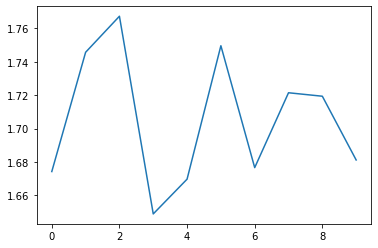

In [88]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X_scaled
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = grid.best_estimator_    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_log_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_log_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [98]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.01]
    }
catboost = CatBoostRegressor(random_state=42)
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.6min finished


0:	learn: 190575.2061560	total: 33.3ms	remaining: 33.2s
1:	learn: 190575.1008095	total: 48.2ms	remaining: 24s
2:	learn: 190574.9249531	total: 70.7ms	remaining: 23.5s
3:	learn: 190573.4487529	total: 89.2ms	remaining: 22.2s
4:	learn: 190569.1806774	total: 118ms	remaining: 23.5s
5:	learn: 190566.7775649	total: 134ms	remaining: 22.1s
6:	learn: 190566.4813646	total: 156ms	remaining: 22.1s
7:	learn: 190565.5971317	total: 167ms	remaining: 20.7s
8:	learn: 190562.7087300	total: 180ms	remaining: 19.8s
9:	learn: 190562.6793652	total: 198ms	remaining: 19.6s
10:	learn: 190561.4889869	total: 220ms	remaining: 19.8s
11:	learn: 190561.4859196	total: 242ms	remaining: 19.9s
12:	learn: 190560.9974464	total: 270ms	remaining: 20.5s
13:	learn: 190560.9795542	total: 291ms	remaining: 20.5s
14:	learn: 190560.9609565	total: 303ms	remaining: 19.9s
15:	learn: 190560.9541579	total: 321ms	remaining: 19.8s
16:	learn: 190544.3716819	total: 340ms	remaining: 19.7s
17:	learn: 190544.3539692	total: 362ms	remaining: 19.7s


In [101]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

Streaming output truncated to the last 5000 lines.
1007:	learn: 262904.8519965	total: 11.5s	remaining: 11.4s
1008:	learn: 262904.5767694	total: 11.5s	remaining: 11.3s
1009:	learn: 262903.7835403	total: 11.6s	remaining: 11.3s
1010:	learn: 262899.6686338	total: 11.6s	remaining: 11.3s
1011:	learn: 262895.2489195	total: 11.6s	remaining: 11.3s
1012:	learn: 262894.2447606	total: 11.6s	remaining: 11.3s
1013:	learn: 262892.0097699	total: 11.6s	remaining: 11.3s
1014:	learn: 262889.9138887	total: 11.6s	remaining: 11.3s
1015:	learn: 262889.2250406	total: 11.6s	remaining: 11.3s
1016:	learn: 262888.4112345	total: 11.7s	remaining: 11.3s
1017:	learn: 262888.3889498	total: 11.7s	remaining: 11.3s
1018:	learn: 262888.1348435	total: 11.7s	remaining: 11.2s
1019:	learn: 262877.1712603	total: 11.7s	remaining: 11.2s
1020:	learn: 262876.5967886	total: 11.7s	remaining: 11.2s
1021:	learn: 262876.5238003	total: 11.7s	remaining: 11.2s
1022:	learn: 262876.2472257	total: 11.7s	remaining: 11.2s
1023:	learn: 262860.2

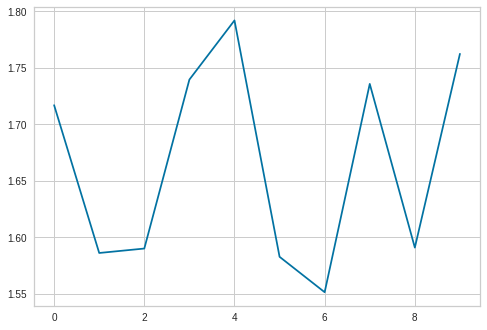

In [104]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =2000, random_state = 42)    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(rmsle(preds,ytest))
        scores.append(rmsle(preds,ytest))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [106]:
pred = model.predict(test_new)

In [107]:
pred

array([11941.87692816, 19005.82224574, 14993.10917555, ...,
       18175.69236672, 16933.13788594, 15483.56258448])

In [109]:
res = pd.DataFrame(pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Price"]
res.to_csv("submission_catboost.csv",index=False) # the csv file will be saved locally on the same location where this notebook is located.